# Testing ASCIIFY- an Exploration of the data behind drawing images with ASCII characters

I've created ASCIIFY, a png to txt converter, but the existence of such a tool raises the question: "What concentration of ASCII characters (pixel density) provides the best results in terms of conversion accuracy (currently evaluated through euclidean distances)"

To begin to answer that question I will be using the [Labeled Faces in the Wild](https://vis-www.cs.umass.edu/lfw/) dataset, which provides a large number of face images of consistent dimensions (250x250) for me to use

In [15]:
#Imports
import asciify
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [16]:
#confirming number of faces
names = []

for name in os.listdir("input-files/110_faces"): #directory with our sample of names
    names.append(name)

print(len(names))

110


From a single test from pixel_size 1 to 20, I would approximate the time to complete a full analysis (from pixel_size 1 to 250) at around 25 minutes. If I want to analyze a single image from every face in the dataset it would take 99 days of computation. That being said 5,000 data points of this seems like overkill, so rather than start working further on the efficiency of ASCIIFY itself I used a sample of the first image of the first 110 faces and completed a full analysis for each of the 110 images (running ASCIIFY 27500 times in total). The data I collected took around 26 hours to run.

#NOTE: The first 110 faces are almost exclusively names beginning with A, but for the purposes of this light analysis I will be taking it as a valid generalization of the whole despite possible overrepresentation of sexes and ethnicities

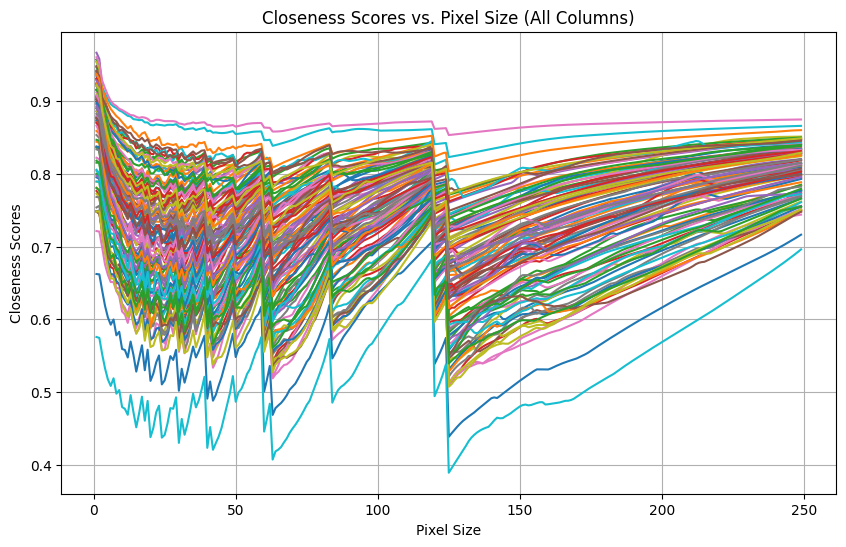

In [17]:
df = pd.read_csv("output-files/face_data.csv")
plt.figure(figsize=(10, 6))
for column in df.columns:
    if column != 'pixel_size':  # Assuming 'pixel_size' is not a data column to be plotted against
        plt.plot(df['pixel_size'], df[column], label=column)
plt.title('Closeness Scores vs. Pixel Size (All Columns)')
plt.xlabel('Pixel Size')
plt.ylabel('Closeness Scores')
        
plt.grid(True)
plt.show()

In [18]:
df.head()

,pixel_size,input-files/110_faces/Ainsworth_Dyer/Ainsworth_Dyer_0001.jpg,input-files/110_faces/Agnelo_Queiroz/Agnelo_Queiroz_0001.jpg,input-files/110_faces/Adam_Sandler/Adam_Sandler_0001.jpg,input-files/110_faces/Aitor_Gonzalez/Aitor_Gonzalez_0002.jpg,input-files/110_faces/Adrian_Fernandez/Adrian_Fernandez_0001.jpg,input-files/110_faces/Alan_Greer/Alan_Greer_0001.jpg,input-files/110_faces/Abdullah_al-Attiyah/Abdullah_al-Attiyah_0001.jpg,input-files/110_faces/Adisai_Bodharamik/Adisai_Bodharamik_0001.jpg,input-files/110_faces/Adel_Al-Jubeir/Adel_Al-Jubeir_0001.jpg,...,input-files/110_faces/Akbar_Al_Baker/Akbar_Al_Baker_0001.jpg,input-files/110_faces/Al_Pacino/Al_Pacino_0001.jpg,input-files/110_faces/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg,input-files/110_faces/Adoor_Gopalakarishnan/Adoor_Gopalakarishnan_0001.jpg,input-files/110_faces/Alanis_Morissette/Alanis_Morissette_0001.jpg,input-files/110_faces/Ai_Sugiyama/Ai_Sugiyama_0004.jpg,input-files/110_faces/Aidan_Quinn/Aidan_Quinn_0001.jpg,input-files/110_faces/Agbani_Darego/Agbani_Darego_0001.jpg,input-files/110_faces/Abdullatif_Sener/Abdullatif_Sener_0002.jpg,input-files/110_faces/Adam_Scott/Adam_Scott_0001.jpg
0,1,0.940576,0.890210,0.923715,0.776279,0.966372,0.930581,0.748470,0.799118,0.895205,...,0.575693,0.873909,0.870222,0.780474,0.869913,0.892741,0.876477,0.960150,0.882599,0.921619
1,2,0.932403,0.888248,0.916737,0.770159,0.957711,0.923069,0.747997,0.793999,0.890461,...,0.574401,0.869870,0.866884,0.776829,0.865831,0.886950,0.870173,0.951860,0.878357,0.916239
2,3,0.895083,0.860277,0.899127,0.735585,0.916937,0.882908,0.715078,0.763395,0.871629,...,0.551865,0.836229,0.825703,0.745548,0.841185,0.840959,0.832621,0.928080,0.853553,0.886699
3,4,0.871005,0.840077,0.889433,0.712012,0.897482,0.858393,0.691704,0.742053,0.858610,...,0.532546,0.816582,0.797592,0.722343,0.826316,0.812235,0.813092,0.917362,0.837728,0.868367
4,5,0.850888,0.822272,0.881926,0.692046,0.879891,0.838801,0.672415,0.721660,0.847419,...,0.517498,0.799275,0.776041,0.700920,0.810563,0.788758,0.795536,0.908075,0.825557,0.851809


Above is a graph of the data for a sample of the first 110 names in the LFW dataset. It is clear that there exists some pattern to describe the relationship between pixel_size and closeness score, but the exact nature of that relationship is still a mystery.

The first question I have to answer is an evaluation of my method of evaluation, as if the jaggedy behavior of the graph is caused by the evaluation itself then seeing it repeat so many times is simply meaningless. To do this, I will use a 'perfect' image, a 250x250 pixel containing a set of intensity value 30 pixels.

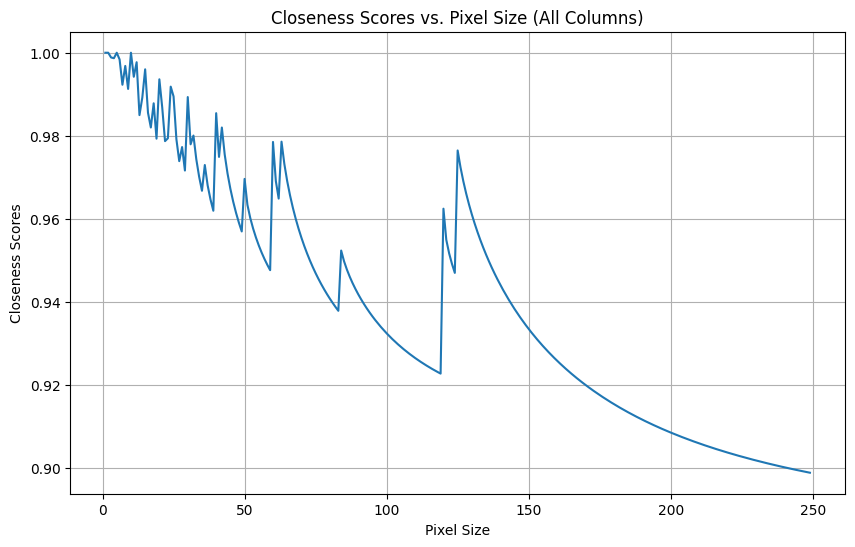

In [19]:
blank_df = pd.read_csv('output-files/blank.csv')
plt.figure(figsize=(10, 6))
plt.plot(blank_df['pixel_size'], blank_df['input-files/blank.jpg'])
plt.title('Closeness Scores vs. Pixel Size (All Columns)')
plt.xlabel('Pixel Size')
plt.ylabel('Closeness Scores')
        
plt.grid(True)
plt.show()

As you can see even with a "perfect" input image there is a level of migration downwards (interesting as the majority of scores tend to migrate upwards in the end). I'm really not sure why this is, and while it definitely warrants further exploration I will look at two potential solutions to this offset:

1. Subtracting the blank data (ex. tested 100% becomes 0, tested 1 with blank closeness 0.5 becomes 0.5)
2. Dividing the data by the blank data (ex. blank closeness score will stay the same, 0.5 blank closeness score would double)

## Subtraction Method

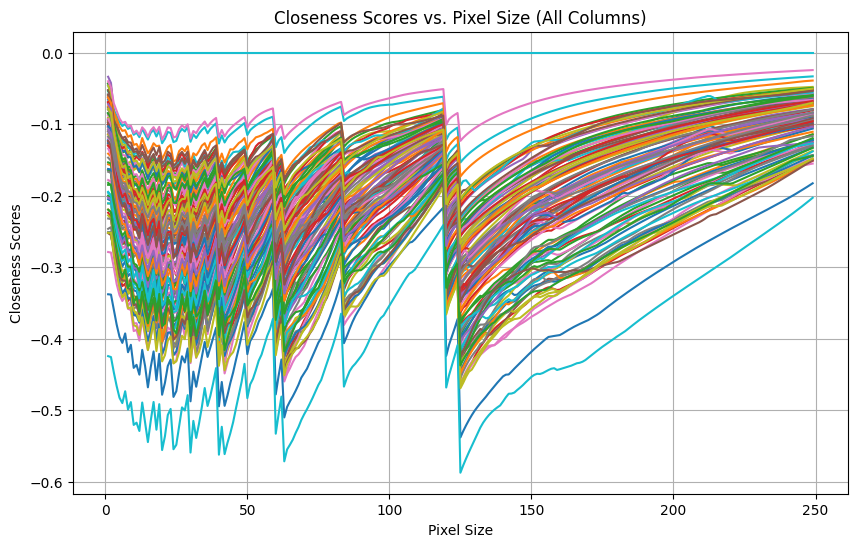

In [20]:
sub_df = pd.read_csv("output-files/face_data.csv")
sub_df['blank'] = blank_df['input-files/blank.jpg']
# print(len(blank_df))
# blank_df.head()
counter = 0
for col in sub_df.columns:
    if counter > 0:
        sub_df[col] = sub_df[col] - sub_df['blank']
    counter += 1

# sub_df.tail(100)

plt.figure(figsize=(10, 6))
for column in sub_df.columns:
    if column != 'pixel_size':  
        plt.plot(sub_df['pixel_size'], sub_df[column], label=column)
plt.title('Closeness Scores vs. Pixel Size (All Columns)')
plt.xlabel('Pixel Size')
plt.ylabel('Closeness Scores')
        
plt.grid(True)
plt.show()


## Division Method

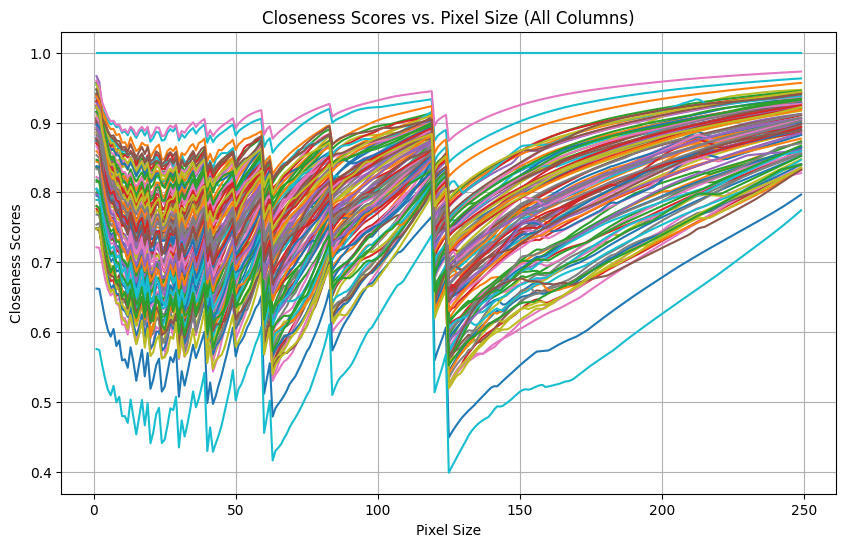

In [21]:
div_df = pd.read_csv("output-files/face_data.csv")
div_df['blank'] = blank_df['input-files/blank.jpg']
# print(len(blank_df))
# blank_df.head()
counter = 0
for col in div_df.columns:
    if counter >0:
        div_df[col] = div_df[col] / div_df['blank']
    counter += 1

plt.figure(figsize=(10, 6))
for column in div_df.columns:
    if column != 'pixel_size':  
        plt.plot(div_df['pixel_size'], div_df[column], label=column)
plt.title('Closeness Scores vs. Pixel Size (All Columns)')
plt.xlabel('Pixel Size')
plt.ylabel('Closeness Scores')
        
plt.grid(True)
plt.show()


It seems that the two kinds of manipulation are leaving the exact same distributions, I spent a bit checking if I am incorrectly calculating but as far as I can tell this is correct.

Overall these adjustments don't make any major changes, just slightly emphasizing the peaks of the graph.

I still feel there's a possibility that some of the noise could be caused by the because I can't really understand why any possible image could spike at the same exact times, but I'm happy to leave this basic exploration here.

# Normalization

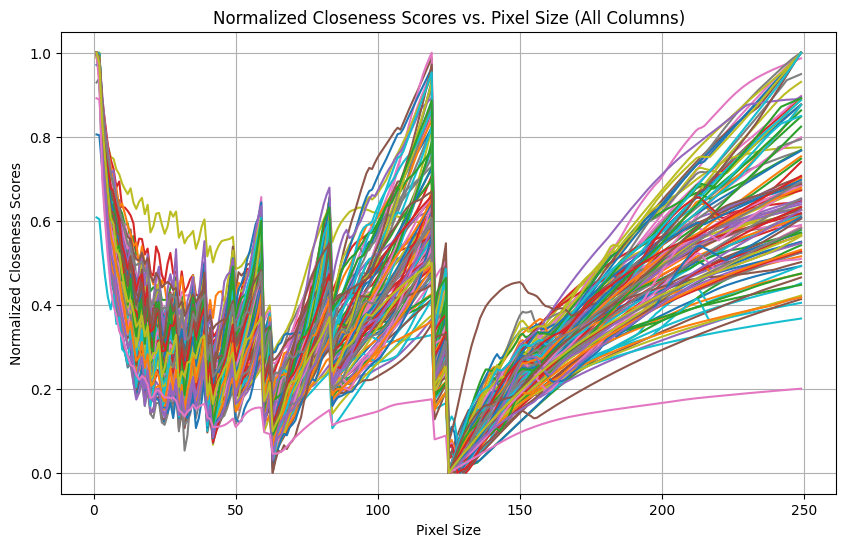

In [30]:
scaler = MinMaxScaler()

normalized_df = df.copy()
columns_to_normalize = [column for column in df.columns if column != 'pixel_size']

for col in columns_to_normalize:
    normalized_df[col] = scaler.fit_transform(normalized_df[[col]])

plt.figure(figsize=(10, 6))
for column in normalized_df.columns:
    if column != 'pixel_size':
        plt.plot(normalized_df['pixel_size'], normalized_df[column], label=column)

plt.title('Normalized Closeness Scores vs. Pixel Size (All Columns)')
plt.xlabel('Pixel Size')
plt.ylabel('Normalized Closeness Scores')
plt.grid(True)
plt.show()

There is most definitely some sort of relationship happening here, but after normalization it's confusing to me how much noise there still is! To create a trend line I'll take the average of every row and make that a new column in the df

/var/folders/11/0nhj09c913x0__zyrscrhffh0000gn/T/ipykernel_18019/103527136.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized_df['average'] = normalized_df[columns_to_normalize].mean(axis=1)


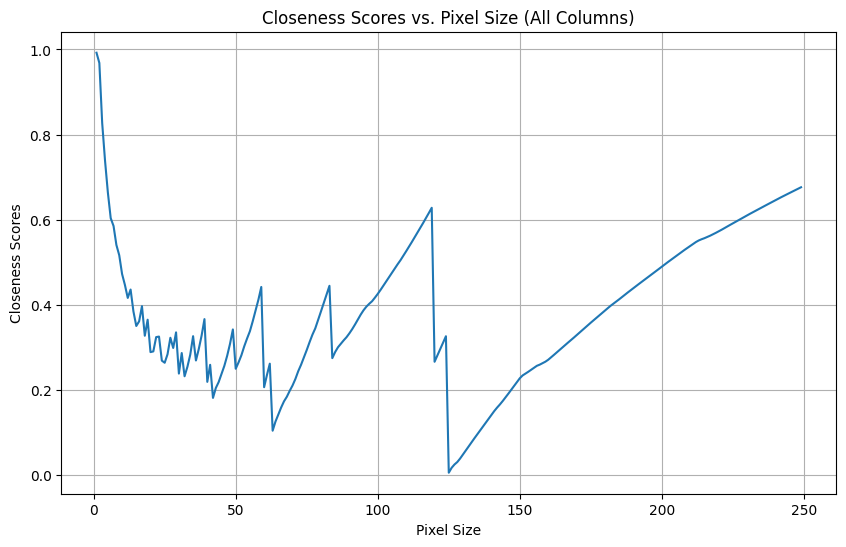

In [31]:
normalized_df['average'] = normalized_df[columns_to_normalize].mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(normalized_df['pixel_size'], normalized_df['average'])
plt.title('Closeness Scores vs. Pixel Size (All Columns)')
plt.xlabel('Pixel Size')
plt.ylabel('Closeness Scores')
        
plt.grid(True)
plt.show()

In [34]:
average_df = pd.DataFrame()
average_df['pixel_size'] = normalized_df['pixel_size']
average_df['normalized_average'] = normalized_df['average']

average_df.to_csv("output-files/average.csv", index=False)

average_df.head()

,pixel_size,normalized_average
0,1,0.992310
1,2,0.968234
2,3,0.827210
3,4,0.738930
4,5,0.664026


# Most Accurate Faces

In [10]:
df2 = df.transpose()

sorted_df = df2.sort_values(by=0, ascending=False)
sorted_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
pixel_size,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0
input-files/110_faces/Adrian_Fernandez/Adrian_Fernandez_0001.jpg,-0.033628,-0.042289,-0.081920,-0.101197,-0.120109,-0.131912,-0.132628,-0.141681,-0.145835,-0.157580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Agbani_Darego/Agbani_Darego_0001.jpg,-0.039850,-0.048140,-0.070776,-0.081318,-0.091925,-0.098023,-0.096644,-0.103670,-0.102004,-0.112315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Ahmed_Ghazi/Ahmed_Ghazi_0001.jpg,-0.042915,-0.047837,-0.092400,-0.119968,-0.142198,-0.159693,-0.159348,-0.175869,-0.175911,-0.195337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Al_Davis/Al_Davis_0001.jpg,-0.043305,-0.050399,-0.090524,-0.113113,-0.133633,-0.149206,-0.147521,-0.163296,-0.164319,-0.182618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Abdoulaye_Wade/Abdoulaye_Wade_0003.jpg,-0.045986,-0.055997,-0.089463,-0.104511,-0.117297,-0.124276,-0.127006,-0.131687,-0.136250,-0.142143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Abdul_Majeed_Shobokshi/Abdul_Majeed_Shobokshi_0001.jpg,-0.046297,-0.055274,-0.086558,-0.102327,-0.117856,-0.128462,-0.128697,-0.140124,-0.138120,-0.151689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Aaron_Pena/Aaron_Pena_0001.jpg,-0.052010,-0.059776,-0.086429,-0.099281,-0.111811,-0.120057,-0.122282,-0.128447,-0.132130,-0.138993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Aaron_Sorkin/Aaron_Sorkin_0002.jpg,-0.052951,-0.062016,-0.101127,-0.114555,-0.131673,-0.139807,-0.137636,-0.146708,-0.143773,-0.157972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
input-files/110_faces/Adrian_Nastase/Adrian_Nastase_0002.jpg,-0.053811,-0.061563,-0.108258,-0.129693,-0.148655,-0.159300,-0.159233,-0.171864,-0.169197,-0.186313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see, it seems Adrian Fernandez is the most asciifyable person in the sample of the dataset I used!

# Conclusion

Overall this project has been a really interesting foray into image processing technology and its applications. I really like this idea of "similarity" between images, I think it maps very interestingly to the work I do in machine translation measuring the similarity between two sentences.

Going forward a useful application of this research is in finding the postive outliers of a given image's asciification (which would be particularly good looking examples of the image). When a user chooses to ASCIIFY an image, ASCIIFY is ran on a wide range of pixel_size values (excluding a useless range which should be calculated based on image size), and depending on the average normalized closeness score of this large dataset positive outliers can be located and recommended to the user (which is something I plan on implementing soon).